# Penn State STAT501 - Applied Regression Models (Multiple Linear Regression)

![](https://www.engr.psu.edu/ae/thesis/portfolios/2014/gvl5037/penn%20state%20logo.png)

source: [Penn State Statistics 501](https://newonlinecourses.science.psu.edu/stat501/node/251/)

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## IQ and Physical Characteristics

#### Are a person's brain size and body size predictive of his or her intelligence?

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/MRI_brain/index.jpg)

Since the topic is MLR we can see that the model will have more than on predictor:

- Response (y): Performance IQ scores (PIQ) from the revised Wechsler Adult Intelligence Scale. This variable served as the investigator's measure of the individual's intelligence.
- Potential predictor (x1): Brain size based on the count obtained from MRI scans (given as count/10,000). 
- Potential predictor (x2): Height in inches.
- Potential predictor (x3): Weight in pounds.

In [2]:
iqsize = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/iqsize/index.txt")
iqsize.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


A common way of investigating the relationships among all of the variables is by way of a __"scatter plot matrix."__. Here's what one version of a scatter plot matrix looks like for our brain and body size example:  

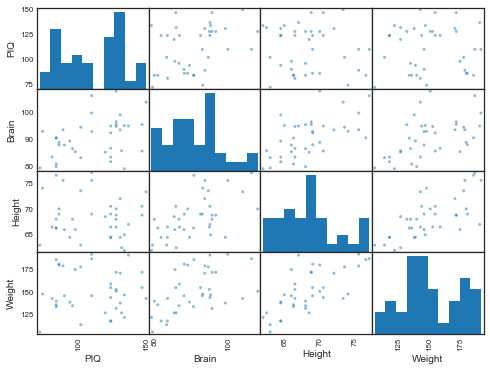

In [40]:
pd.plotting.scatter_matrix(iqsize, figsize=(8,6))
plt.show()

For each scatter plot in the matrix, the variable on the y-axis appears at and the variable on the x-axis appears at the bottom of the plot's column.

__So what does a scatter matrix plot tell us?__
1. ___Are there any egregiously erroneous data errors?__
2. __Marginal Relationships__ - scatter plot also illustrates __marginal relathionships__ between each pair of variables _without regard to the other variables_ _(e.g., brain size is the best single predictor of PIQ, but no of the other are particualy strong)_

__In multiple linear regression, the challenge is to see how the response y relates to all three predictors simultaneously.__

### Formulating a model
Start regression analysis by formulating a model. For this case we can formulate a model with __3 quantitative predictors__ for our brain and body example:

$$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\beta_3x_{i3})+\epsilon_i$$

where:
- yi is the intelligence (PIQ) of student i
- xi1 is the brain size (MRI) of student i
- xi2 is the height (Height) of student i
- xi3 is the weight (Weight) of student i

### Research Questions:


- Which, if any, predictors â€” brain size, height, or weight â€” explain some of the variation in intelligence scores? (Conduct hypothesis tests for individually testing whether each slope parameter could be 0.)


- What is the effect of brain size on PIQ, after taking into account height and weight? (Calculate and interpret a confidence interval for the brain size slope parameter.)


- What is the PIQ of an individual with a given brain size, height, and weight? (Calculate and interpret a prediction interval for the response.)

### Regression Modeling
In order to fit a multiple linear regression model using least quares, we use `smf.ols()` to fit the linear model with the syntax as y ~ x1 + x2 + x3) is used to fit a model with __three predictors__.

Below is the regression output to estimate the multiple regression model we formulated above.

In [12]:
iqsize_model = smf.ols(formula='PIQ ~ Brain + Height + Weight', 
                       data = iqsize).fit()

print(iqsize_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Mon, 04 Feb 2019   Prob (F-statistic):            0.00722
Time:                        18:50:28   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.0

#### Interpretation of Regression Analysis: PIQ vs Brain, Height, Weight
Above is the MLR regersion model output.

- __R-squared = 29.49%__ tell us that 29.49% of the variation in intelligence, as quantified by `PIQ` is reduced by taking into account brain size, height and weight. 


- __R-Squared Adjusted = 23.27%__ When considering different multiple linear regression models for PIQ, we could use this value to help compare the models.

> Which, if any, predictors â€” brain size, height, or weight â€” explain some of the variation in intelligence scores? (Conduct hypothesis tests for individually testing whether each slope parameter could be 0.)

From the output above, it appears that slope parameters `Brain` and `Height` are significantly different from 0 when performing the t-test, while `Weight` is not. Therefore, have evidence to suggest (alpha = 0.05) to explain the variation in intelligence scores. `Brain` more so than `Height`. 


> What is the effect of brain size on PIQ, after taking into account height and weight? (Calculate and interpret a confidence interval for the brain size slope parameter.)

After taking into account the `height` and `weight`, in which they remain constant, we are 95% confidence the effect of brain size on PIQ is between 0.919 and 3.205. 


> What is the PIQ of an individual with a given brain size, height, and weight? (Calculate and interpret a prediction interval for the response.)

We are 95% confidence 

Below is the __ANOVA Adjusted/Type III Sum of Squares Model__ that represent the reductions in error sum of squares for each term relative to a model that contains all of the remaining terms. 

In [31]:
anova_ = sm.stats.anova_lm(iqsize_model, typ=3)
print(anova_)

                 sum_sq    df          F    PR(>F)
Intercept   1225.209449   1.0   3.126987  0.085979
Brain       5239.230101   1.0  13.371595  0.000856
Height      1934.712697   1.0   4.937786  0.033034
Weight         0.003163   1.0   0.000008  0.997750
Residual   13321.808196  34.0        NaN       NaN


The P-value for the analysis of variance F-test (P = 0.007) suggests that the model containing Brain, Height and Weight is more useful in predicting intelligence than not taking into account the three predictors.

## Underground air quality

#### What are the breathing habits of baby birds that live in underground burrows?

![](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/bank_swallow/index.png)

__Some researchers (Colby, et al, 1987) wanted to find out if nestling bank swallows, which live in underground burrows, also alter how they breathe.__

In [32]:
birds = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/babybirds/index.txt")
birds.head()

,Vent,O2,CO2
0,-49,19,0.0
1,0,19,0.0
2,-98,19,0.0
3,148,19,0.0
4,49,19,0.0


Here is a scatter plot matrix of the resulting data behind the research

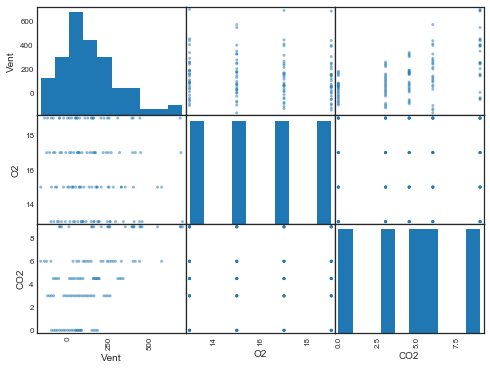

In [42]:
pd.plotting.scatter_matrix(birds, figsize=(8,6))
plt.show()

#### Analysis 
- There doesn't appear to be a substantial relationship between minute ventilation (Vent) and percentage of oxygen (O2).
- The relationship between minute ventilation (Vent) and percentage of carbon dioxide (CO2) appears to be curved and with increasing error variance.
- The plot between percentage of oxygen (O2) and percentage of carbon dioxide (CO2) is the classical appearance of a scatter plot for the experimental conditions

### Regression Modeling
Here is a __"first order"__ model with __two quantitative predictors__ we could use to summarize the data:

$$y_i=(\beta_0+\beta_1x_{i1}+\beta_2x_{i2})+\epsilon_i$$

__First Order__ refers to a model in which the highest power on all of the predictor terms is one. 

Here is an examlpe of a __"second order"__ model:

$$y=\beta_0+\beta_1x+\beta_2x^2+\epsilon$$

In [43]:
birds_model = smf.ols(formula="Vent ~ O2 + CO2", data = birds).fit()
print(birds_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Vent   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     21.44
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.17e-08
Time:                        19:22:59   Log-Likelihood:                -775.79
No. Observations:                 120   AIC:                             1558.
Df Residuals:                     117   BIC:                             1566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.9008    106.006      0.810      0.4

### Analysis
- `R-Squared = 0.268` which indicates only 26.8% of the variation in `minute ventilation` is reduced by taking into account the percentages of oxygem and carbon dioxide. 


> Is oxygen related to minute ventilation, after taking into account carbon dioxide? (Conduct a hypothesis test for testing whether the O2 slope parameter is 0.)

with `CO2` held constanct, `o2` does not relate to minute ventilation as a result of our testing `O2` pvalue is not less than our significance level of 0.05.

> Is carbon dioxide related to minute ventilation, after taking into account oxygen? (Conduct a hypothesis test for testing whether the CO2 slope parameter is 0.)

Yes. There is significant evidence to concludde CO2 is related to minute ventilation after taking into account oxygen. 


>What is the mean minute ventilation of all nestling bank swallows whose breathing air is comprised of 15% oxygen and 5% carbon dioxide? (Calculate and interpret a confidence interval for the mean response.)

In [49]:
# Statsmodel - prediction for new observation
print("Mean vent predicted: ",birds_model.predict(pd.DataFrame({'O2':[15], 'CO2':[0.05]})))

Mean vent predicted:  0    7.505972
dtype: float64


In [44]:
birds.head()

,Vent,O2,CO2
0,-49,19,0.0
1,0,19,0.0
2,-98,19,0.0
3,148,19,0.0
4,49,19,0.0
